In [1]:
import pandas as pd

In [2]:
import utils

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.figsize'] = (9, 6)


In [4]:
raw = pd.read_csv('current.csv')
data = utils.read_fred(raw).resample("YS").sum()


In [5]:
education = pd.read_excel("education.xlsx").iloc[0:399, 0:8]
education.Year = education.Year.apply(lambda y: pd.to_datetime(f"1/1/{y}"))
education = education.set_index('Year').sort_index()

phi = education.C2 / education.Total
data["phi"] = phi

In [6]:
h = data[['USEHS', 'USFIRE', 'USINFO', 'USPBS']].sum(axis=1) 
l = data.PAYEMS  - h 

In [7]:
H = pd.read_csv('ip.csv')
H.YEAR = H.YEAR.apply(lambda y: pd.to_datetime(f"01/01/{y}"))
H = H.set_index("YEAR")

In [8]:
K = pd.read_csv("capital.csv")
K.DATE = K.DATE.apply(pd.to_datetime)
K = K.set_index("DATE")

In [35]:
alpha = pd.read_csv("labour_share.csv")
alpha.DATE = alpha.DATE.apply(pd.to_datetime)
alpha = alpha.set_index("DATE")

In [45]:
base_cpi = 227.842
K_cpi_deflator = 247.736 / base_cpi
alpha_cpi_deflator = 276.724 / base_cpi


data["H"] = H
data["h"] = h
data["l"] = l
data["K"] = K / (100 * K_cpi_deflator)
data["alpha"] = 1 - alpha 

calibration_data = data[["GDPC1", "K", "h", "l", "H", "phi", "alpha"]].dropna(axis = 0)

In [46]:
calibration_data.rename({"GDPC1": "Y"}, axis = 1).to_csv("calibration_data.csv")

<AxesSubplot:xlabel='sasdate'>

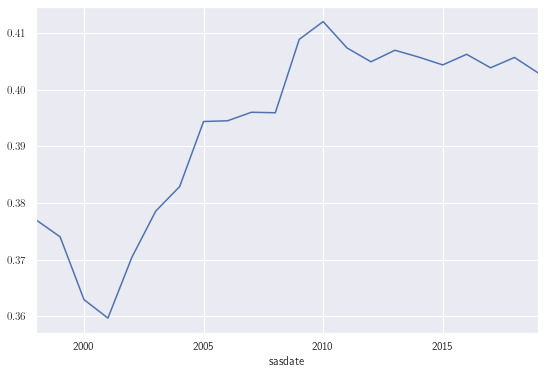

In [48]:
calibration_data["alpha"].plot()